In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from random import sample
from copy import copy

In [2]:
def can_place(peb_node, peb_step, P, G):
    return peb_node not in P[peb_step] and set(G.predecessors(peb_node)) <= set(P[peb_step])

def is_legal_classic(P, G):
    n = G.number_of_nodes()
    if 0 not in P[0] or n-1 not in P[-1]:
        print('first step wrong', n, P)
        return False

    for i in range(1,len(P)):
        for v in P[i]:
            if not can_place(v, i-1, P, G):
                print('illegal pebbling move')
                print(G, v, i,P)
                return False
    return True

class Pebbling():
    def __init__(self, G, P):
        self.G = G
        self.P = P
        # assert is_legal_classic(P, G)
        self.n =  G.number_of_nodes()
        self.pebbling_matrix = np.zeros((len(P), self.n))
        for i in range(len(P)):
            for v in P[i]:
                self.pebbling_matrix[i][v] = 1

    def show_graph(self):
        nx.draw(self.G, with_labels=True)

    def show_pebbling(self):
        plt.matshow(self.pebbling_matrix)


In [89]:
from collections.abc import Iterable

def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (int, str, bytes)):
            yield from flatten(x)
        else:
            yield x

def get_recursive(L, i):
    print('starting', L,i)
    if not isinstance(L, list):
        if i == 0:
            return L, i
        else:
            return None, i

    for x in L:
        if not isinstance(x, list):
            if i == 0:
                print('returning since we found it', x, i)
                return x, i
            else:
                i -= 1
        else:
            y, j = get_recursive(x, i)
            if j == 0:
                if y is not None:
                    return y, j
            i -= i - j

    return None, i

def set_recursive(L, i, v):
    # print('starting', L,i, v)
    if not isinstance(L, list):
        if i == 0:
            return L, i
        else:
            return None, i
    global_index = 0
    for x in L:
        if not isinstance(x, list):
            if i == 0:
                L[global_index] = v
                # print('returning since we found it', x, i)
                return x, i
            else:
                i -= 1
        else:
            y, j = set_recursive(x, i, v)
            if j == 0:
                if y is not None:
                    x[i-j] = v
                    return y, j
            i -= i - j
        global_index += 1

    return None, i
def get_intervals(k, c=1):
    curr_partition = [0]

    for i in range(1, k):
        temp_partition = copy(curr_partition)
        curr_partition = [curr_partition]
        curr_partition.append(0)
        for x in temp_partition:
            curr_partition.append(x)

    counter = 0
    while True:
        succ, _ = set_recursive(curr_partition, counter, counter)
        # print(succ,'----------------')
        if succ is None:
            break
        counter += 1
    length = counter
    counter -= 1
    while counter >= 0:
        succ, _ = set_recursive(curr_partition, counter, length-counter)
        # print(succ,'----------------')
        if succ is None:
            break
        counter -= 1
    return curr_partition

x=[0,1,[5,1000, [6]], -1,2134]
print('set', set_recursive(x, 8, -1000000))
print(x)
print(get_intervals(4))

set (None, 1)
[0, 1, [5, 1000, [6]], -1, 2134]
[[13, 12, 11, 10, 9], 8, [7, 6, 5], 4, [3], 2, 1]


In [95]:
def place(v, P):
    print(P, 'start',v)
    assert v not in P[-1]
    P.append(copy(P[-1]))
    P[-1].append(v)
    print(P, 'after')

def remove(v, P):
    assert v in P[-1]
    P.append(copy(P[-1]))
    P[-1].remove(v)

def line_peb(k, interval, P):
    if isinstance(interval, int):
        place(interval, P)
        return

    for i in range(k):
        line_peb(k-i,interval[2*(k-i)], P)
        place(2*(k-i)+1, P)
        inv_line_peb(k-i,interval[2*(k-i)], P)

def inv_line_peb(k, interval, P):

    if isinstance(interval, int):
        remove(interval, P)
        return
    for i in range(k,0, -1):
        inv_line_peb(k-i, interval[2*(k-i)], P)
        remove(2*(k-i)+1, P)
        line_peb(k-i, interval[2*(k-i)], P)

interval = get_intervals(3)
print(interval)
P=[[]]
line_peb(2, interval, P)
print(P)

[[7, 6, 5], 4, [3], 2, 1]
[[]] start 1
[[], [1]] after
[[], [1]] start 5
[[], [1], [1, 5]] after


IndexError: list index out of range

In [ ]:
def get_random_pebbling(G, max=30, p_max=.3):
    n = G.number_of_nodes()
    P = [[0]]
    round = 1
    while (n-1) not in P[-1]:
        possible_adds = []
        possible_dels = []
        for v in range(n):
            if can_place(v, -1, P, G):
                print('can place', v)
                possible_adds.append(v)
            elif v in P[-1]:
                possible_dels.append(v)

        actual_adds = sample(possible_adds, randint(len(possible_adds)+1))
        actual_dels = sample(possible_dels, randint(len(possible_dels)+1))

        new_step = copy(P[-1])
        for d in actual_dels:
            if np.random.random() < p_max:
                new_step.remove(d)

        for a in actual_adds:
            print('adding', a)
            new_step.append(a)
        if P[-1] != new_step:
            P.append(new_step)
        round += 1
    P[-1] = [n-1]
    return Pebbling(G, P)

can place 1
can place 0
adding 0
can place 1
can place 1
adding 1
can place 2
can place 2
adding 2
can place 3
can place 1
can place 3
can place 1
can place 3
adding 3
can place 1
can place 4
adding 1
can place 4
can place 4
can place 4
adding 4
can place 2
can place 5
adding 2
adding 5
can place 3
can place 6
adding 6
adding 3


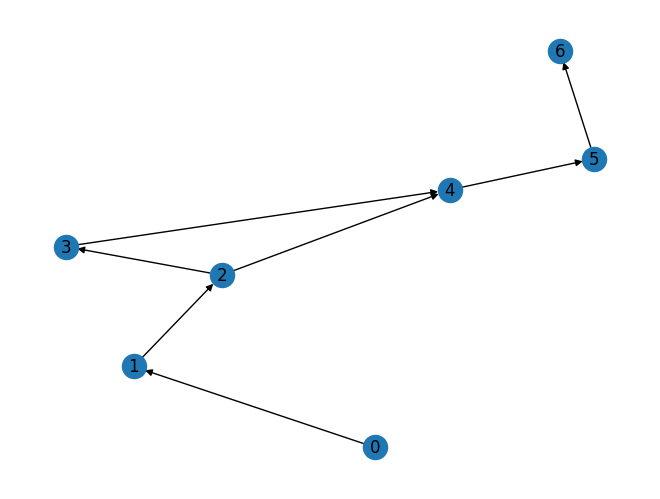

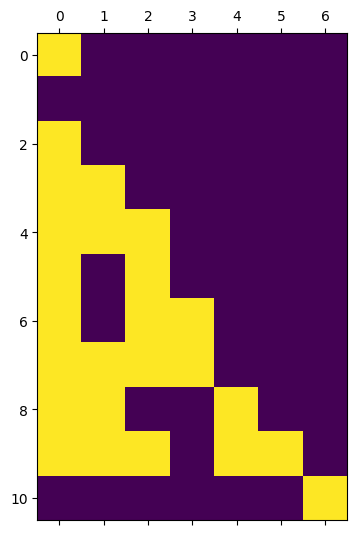

In [5]:
n = 6
G = nx.DiGraph([(i, i+1) for i in range(n)]+[(i, 2*i) for i in range(2,n//2)])
# nx.draw(G, with_labels=True)
P = get_random_pebbling(G)
P.show_graph()
# print(P.is_legal_classic())
P.show_pebbling()

In [10]:
range(1)

range(0, 1)

In [150]:
Bennett(2, interval(2, 1), [])

3


TypeError: 'int' object is not subscriptable

In [12]:
for i in range(10):
    print(randint(2))

0
1
0
1
1
1
0
0
1
0


In [22]:
a=[1,2,2,3,6]
a.remove_all(3,2)
print(a)

AttributeError: 'list' object has no attribute 'remove_all'

In [131]:
print(list(G.predecessors(3)))

[2]


In [52]:
 print(list(range(10,0,-1)))
a=[1,3]
print(a.remove(1))
print(a)

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
None
[3]
